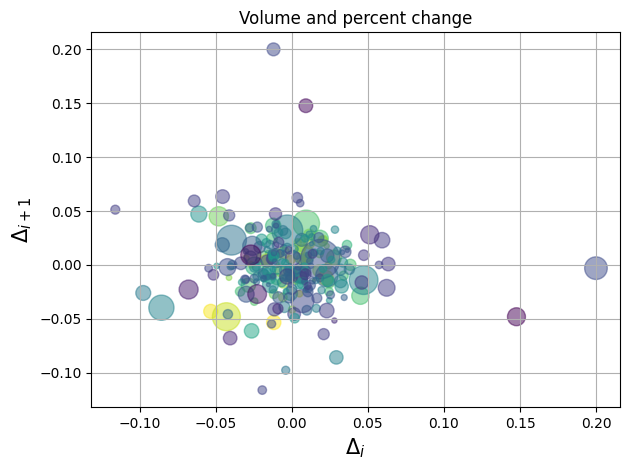

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
price_data = cbook.get_sample_data('goog.npz')['price_data']
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data["adj_close"]) / price_data["adj_close"][:-1]

# Marker size in units of points^2
volume = (15 * price_data["volume"][:-2] / price_data["volume"][0])**2
close = 0.003 * price_data["close"][:-2] / 0.003 * price_data["open"][:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

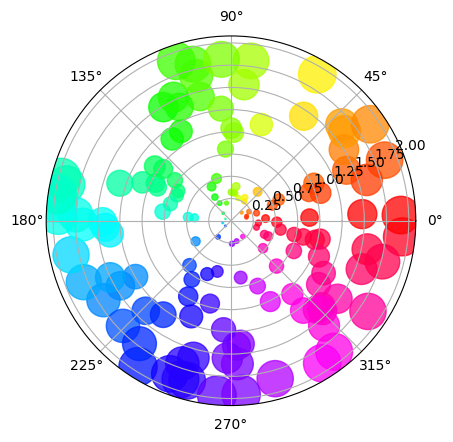

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

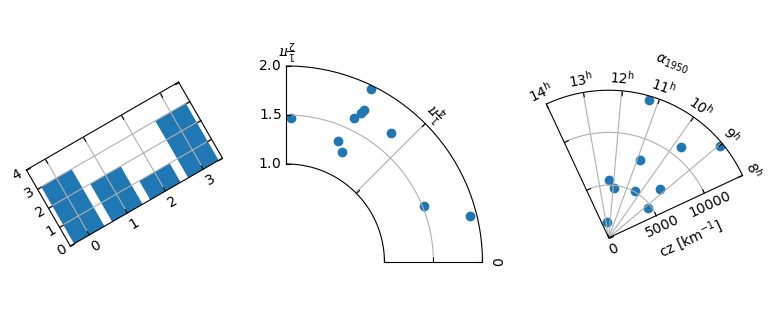

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (DictFormatter, FixedLocator,
                                                 MaxNLocator)

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4),
        grid_locator1=MaxNLocator(nbins=4),
        grid_locator2=MaxNLocator(nbins=4))

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    ax1.grid()

    aux_ax = ax1.get_aux_axes(tr)

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform(apply_theta_transforms=False)

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    ax1.grid()

    # create a parasite Axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform(
        apply_theta_transforms=False)

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    # Specify theta limits in degrees
    ra0, ra1 = 8.*15, 14.*15
    # Specify radial limits
    cz0, cz1 = 0, 14000
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")
    ax1.grid()

    # create a parasite Axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

ax2, aux_ax2 = setup_axes2(fig, 132)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.
aux_ax3.scatter(theta, radius)

plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

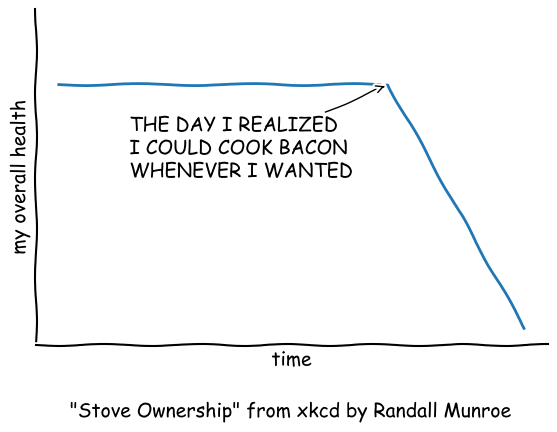

In [13]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

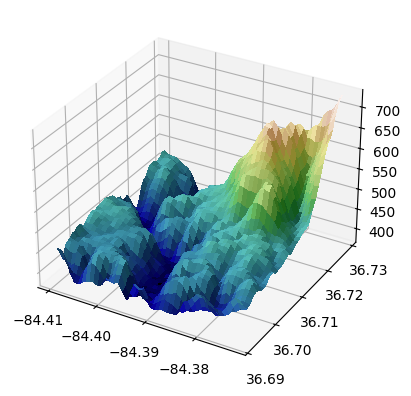

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz')
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

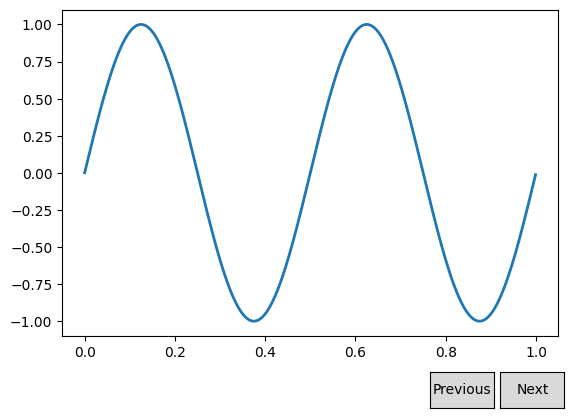

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = ax.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()